###Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Loading the dataset

In [2]:
df = pd.read_csv('/content/netflix_dataset.csv')

In [3]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


###Preprocessing the dataset

In [4]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [5]:
def impute(df: pd.DataFrame):
  df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors = 'coerce')

  df['Director'] = df['Director'].fillna(value = 'Unknown')
  df['Cast'] = df['Cast'].fillna(value = 'Unknown')
  df['Country'] = df['Country'].fillna(value = 'Unknown')
  df['Rating'] = df['Rating'].fillna(value = 'Rating')

  return df

In [6]:
df = impute(df)

In [7]:
import unicodedata

def clean_df(text):
  if isinstance(text, str):
    text =  ''.join(c for c in unicodedata.normalize('NFKD', text)
                  if not unicodedata.combining(c))
    text = text.lower()
    return text
  return text

In [8]:
text_cols = ['Title', 'Director', 'Cast', 'Description']
df[text_cols] = df[text_cols].map(clean_df)

In [9]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,unknown,"joao miguel, bianca comparato, michel gomes, r...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a future where the elite inhabit an island ...
1,s2,Movie,07:19,jorge michel grau,"demian bichir, hector bonilla, oscar serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",after a devastating earthquake hits mexico cit...
2,s3,Movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","when an army recruit is found dead, his fellow..."
3,s4,Movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","in a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",United States,2020-01-01,PG-13,123 min,Dramas,a brilliant group of students become card-coun...


###Exploratory Data Analysis

Number of movies is: 5379, and number of tv show is: 2410


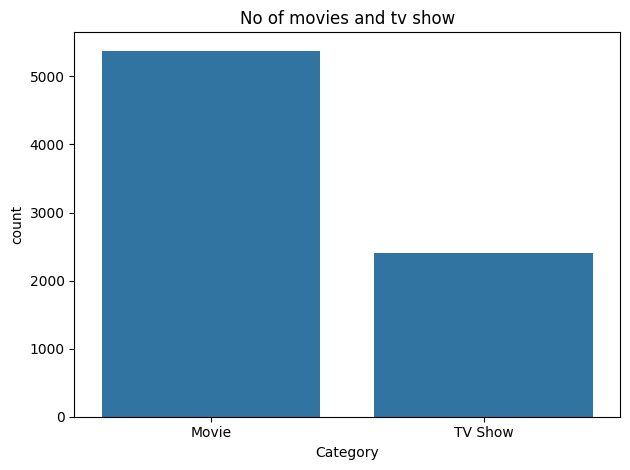

In [10]:
cat_count = df['Category'].value_counts()
print(f'Number of movies is: {cat_count.Movie}, and number of tv show is: {cat_count["TV Show"]}')
sns.barplot(cat_count)
plt.title('No of movies and tv show')
plt.tight_layout()
plt.show()

In [11]:
top_countries = df['Country'].value_counts()
top_countries.head(10)

,count
Country,
United States,2556
India,923
Unknown,507
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115


In [12]:
most_common_ratings = df['Rating'].value_counts()
most_common_ratings.head(10)

,count
Rating,
TV-MA,2865
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194


In [13]:
movies = df.loc[df['Category']=='Movie', ['Title', 'Duration']]

In [14]:
movies['duration_min'] = movies['Duration'].str.extract(r'(\d+)').astype(float)

In [15]:
movies['duration_min'].describe()

,duration_min
count,5379.000000
mean,99.306563
std,28.525684
min,3.000000
25%,86.000000
50%,98.000000
75%,114.000000
max,312.000000


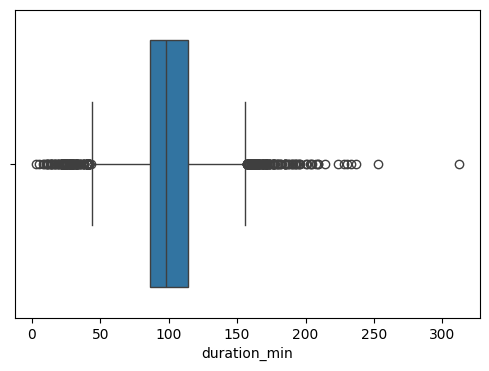

In [16]:
plt.figure(figsize =(6,4))
sns.boxplot(data = movies, x = 'duration_min', )
plt.show()

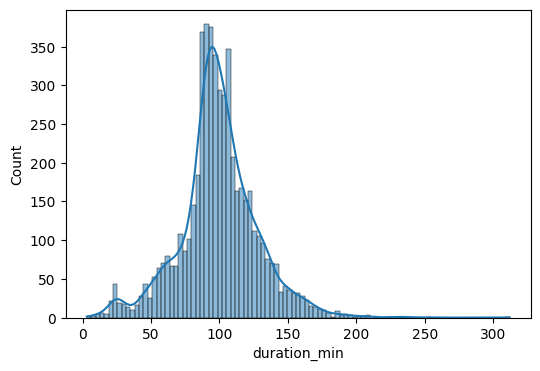

In [17]:
plt.figure(figsize =(6,4))
sns.histplot(data = movies, x = 'duration_min', kde = True)
plt.show()

In [18]:
tvshows = df.loc[df['Category']=='TV Show', ['Title', 'Duration']]

In [19]:
tvshows['season'] = tvshows['Duration'].str.extract(r'(\d+)').astype(float)

In [20]:
tvshows['season'].describe()

,season
count,2410.000000
mean,1.775934
std,1.596359
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,16.000000


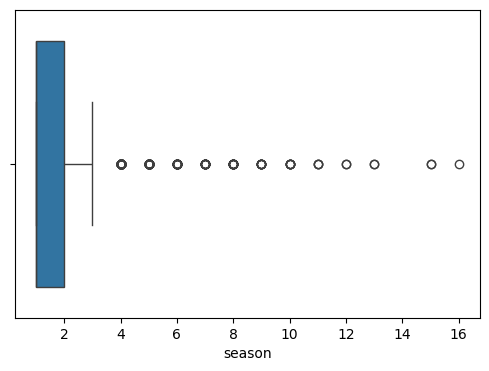

In [21]:
plt.figure(figsize =(6,4))
sns.boxplot(data = tvshows, x = 'season')
plt.show()

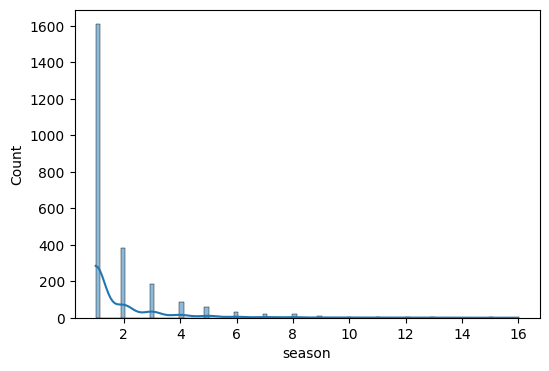

In [22]:
plt.figure(figsize =(6,4))
sns.histplot(data = tvshows, x = 'season', kde = True)
plt.show()

In [23]:
(df['Type']).value_counts()

,count
Type,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
"Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy",1
"Docuseries, Science & Nature TV, TV Action & Adventure",1
"British TV Shows, Classic & Cult TV, Kids' TV",1


###NLP

In [24]:
import spacy

In [25]:
nlp = spacy.load('en_core_web_sm')

In [26]:
def process_description(text):
  doc = nlp(text)

  lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
  pos_tags = [(token.text, token.pos_) for token in doc]

  people = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  countries = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
  dates = [ent.text for ent in doc.ents if ent.label_ == 'DATE']
  numbers = [ent.text for ent in doc.ents if ent.label_ == 'CARDINAL']

  return{
      "lemmas": lemmas,
      "pos_tags": pos_tags,
      "people": people,
      "countries": countries,
      "dates": dates,
      "numbers": numbers
  }


In [27]:
df_copy = df.copy()

In [28]:
df_copy["nlp_processed"] = df_copy["Description"].apply(process_description)

In [29]:
df_copy[['Title','nlp_processed']].head(5)

,Title,nlp_processed
0,3%,"{'lemmas': ['future', 'elite', 'inhabit', 'isl..."
1,07:19,"{'lemmas': ['devastating', 'earthquake', 'hit'..."
2,23:59,"{'lemmas': ['army', 'recruit', 'find', 'dead',..."
3,9,"{'lemmas': ['postapocalyptic', 'world', 'rag',..."
4,21,"{'lemmas': ['brilliant', 'group', 'student', '..."


In [30]:
target_pos = {"VERB", "ADV", "ADJ", "PROPN", "NOUN"}

filtered_words = df_copy['nlp_processed'].apply(
    lambda x: [word for word, pos in x["pos_tags"] if pos in target_pos]
)

In [31]:
all_words = [word for row in filtered_words for word in row]

frequency = pd.Series(all_words)
frequency.value_counts().head(10)

,count
life,757
young,655
new,613
family,553
world,502
man,491
love,448
woman,429
friends,383
series,358


###Sentiment Analysis

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [33]:
sia = SentimentIntensityAnalyzer()

df_copy['des_scores'] = df['Description'].apply(lambda x: sia.polarity_scores(str(x)))
df_copy = pd.concat([df_copy, df_copy['des_scores'].apply(pd.Series)], axis = 1)
print(df_copy[['Description', 'compound']].head())

                                         Description  compound
0  in a future where the elite inhabit an island ...    0.8807
1  after a devastating earthquake hits mexico cit...   -0.7096
2  when an army recruit is found dead, his fellow...   -0.9300
3  in a postapocalyptic world, rag-doll robots hi...   -0.5574
4  a brilliant group of students become card-coun...    0.3818


In [34]:
def sentiment_score(x):
  if x >= 0.05:
    return 'Positive'
  elif x < 0.05 and x > -0.05:
    return 'Neutral'
  elif x <= -0.05:
    return 'Negative'
  else:
    return 'Unknown'

df_copy['sentiment_score'] = df_copy['compound'].apply(sentiment_score)
print(df_copy[['Title', 'Description', 'compound', 'sentiment_score']].head(5))

   Title                                        Description  compound  \
0     3%  in a future where the elite inhabit an island ...    0.8807   
1  07:19  after a devastating earthquake hits mexico cit...   -0.7096   
2  23:59  when an army recruit is found dead, his fellow...   -0.9300   
3      9  in a postapocalyptic world, rag-doll robots hi...   -0.5574   
4     21  a brilliant group of students become card-coun...    0.3818   

  sentiment_score  
0        Positive  
1        Negative  
2        Negative  
3        Negative  
4        Positive  


In [35]:
df_copy['des_length'] = df['Description'].apply(lambda x: len(str(x).split()))

stats = df_copy.groupby('Category')['des_length'].describe()
print(stats)

           count       mean       std   min   25%   50%   75%   max
Category                                                           
Movie     5379.0  24.003346  2.889239  10.0  22.0  24.0  26.0  48.0
TV Show   2410.0  23.428631  2.766417  12.0  22.0  24.0  25.0  35.0


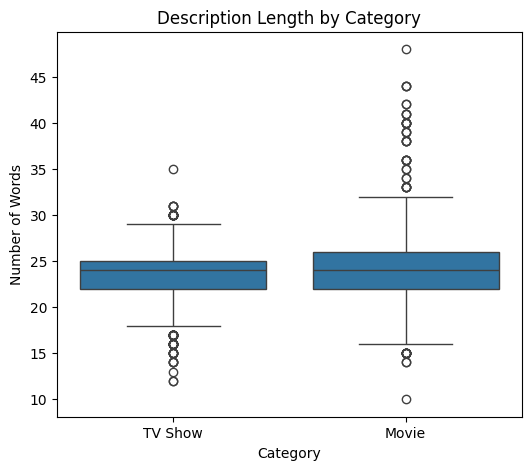

In [36]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_copy, x='Category', y='des_length')
plt.title('Description Length by Category')
plt.ylabel('Number of Words')
plt.show()

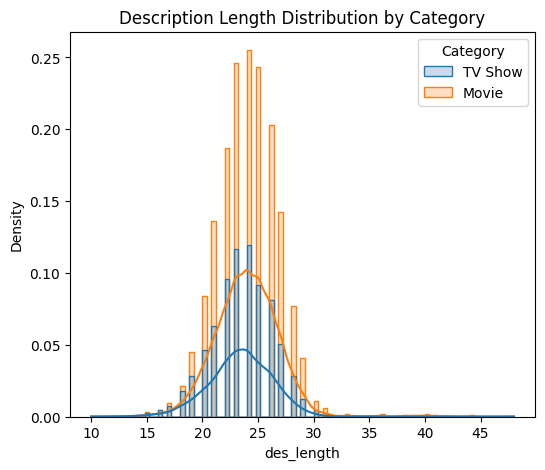

In [37]:
plt.figure(figsize=(6, 5))
sns.histplot(data=df_copy, x='des_length', hue='Category', kde=True, element='step', stat='density')
plt.title('Description Length Distribution by Category')
plt.show()

###Wordcloud of the most frequent words

In [38]:
from wordcloud import WordCloud

words = " ".join(all_words)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', min_font_size = 10).generate(words)

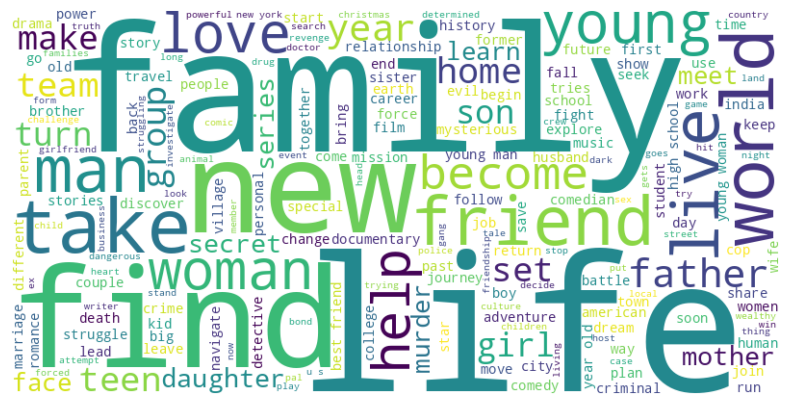

In [39]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###Predicting Movie or TV-show using description

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [41]:
df_copy = df_copy.dropna(subset = ['Description', 'Category'])
df_copy['category_enc'] = df_copy['Category'].map({'Movie': 0, 'TV Show': 1})

X_train, X_test, y_train, y_test = train_test_split(
    df_copy['Description'], df_copy['category_enc'], test_size = 0.2, random_state = 42
)

In [42]:
vec = TfidfVectorizer(stop_words = 'english', max_features = 5000)
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.fit_transform(X_test)

In [43]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = lr.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names = ['Movie', 'TV Show']))

              precision    recall  f1-score   support

       Movie       0.70      0.99      0.82      1088
     TV Show       0.29      0.01      0.02       470

    accuracy                           0.69      1558
   macro avg       0.49      0.50      0.42      1558
weighted avg       0.57      0.69      0.58      1558



###Clustering

In [45]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [47]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 30.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [49]:
nlp = spacy.load('en_core_web_md')
df_copy['desc_vec']= df_copy['Description'].apply(lambda x: nlp(x).vector)

x = np.vstack(df_copy['desc_vec'].values)

In [54]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
df_copy['cluster'] = kmeans.fit_predict(x)

vectors = x
cluster_model = kmeans

In [51]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(x)

/tmp/ipython-input-2000170692.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


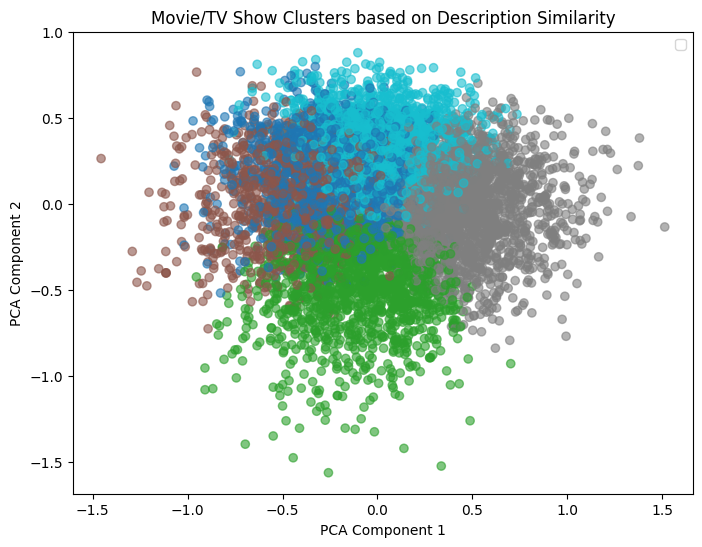

In [53]:
plt.figure(figsize = (8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = df_copy['cluster'], cmap = 'tab10', alpha = 0.6)
plt.title('Movie/TV Show Clusters based on Description Similarity')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

###Recommendation System

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend(title, n=5):
    if title not in df_copy['Title'].values:
        return f"'{title}' not found in dataset."

    idx = df_copy[df_copy['Title'] == title].index[0]

    sims = cosine_similarity([vectors[idx]], vectors)[0]

    similar_indices = sims.argsort()[::-1][1:n+1]

    return df.iloc[similar_indices][['Title', 'Category', 'Description']]

recommendations = recommend("crash", n=5)
print(recommendations)

                        Title Category  \
6900               the square    Movie   
200   a love song for latasha    Movie   
2288                  friends  TV Show   
2762           ho mann jahaan    Movie   
2879                    hyena  TV Show   

                                            Description  
6900  this emmy-winning, street-level view of the 20...  
200   the killing of latasha harlins became a flashp...  
2288  this hit sitcom follows the merry misadventure...  
2762  three friends in modern-day karachi navigate t...  
2879  to survive in a dog-eat-dog world, two rival l...  
